In [ ]:
import cv2


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
config_file='/content/ssd_mobilenet_v3_large_coco_2020_01_14 (1).pbtxt'
frozen_model='/content/frozen_inference_graph (1).pb'

In [ ]:
print(config_file)

/content/ssd_mobilenet_v3_large_coco_2020_01_14 (1).pbtxt


In [ ]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [ ]:
classLabels=[]
file_name='/content/coco.names'
with open(file_name,'rt') as fpt:
  classLabels=fpt.read().rstrip('\n').split('\n')


In [ ]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
print(len(classLabels))

80


In [ ]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7f65faeb6b10>

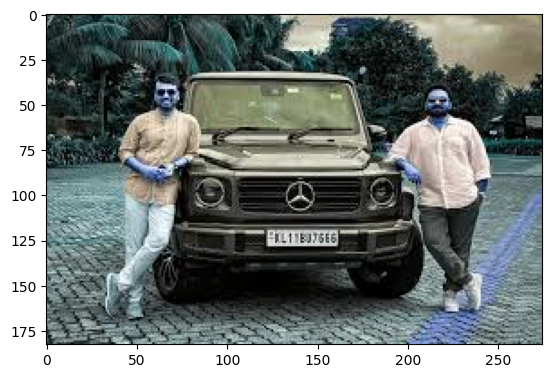

In [ ]:
#reading image
image=cv2.imread('/content/image.jpg')
plt.imshow(image) ##bgr image we nedd to convert into rgb color

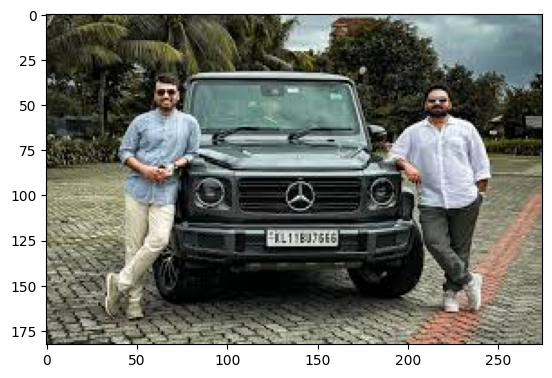

In [ ]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [ ]:
ClassIndex,confidece,bbox=model.detect(image,confThreshold=0.3)

In [ ]:
print(ClassIndex)

[1 1 8 3 1 1 1 3 1]


In [ ]:
print(ClassIndex)

[1 1 8 3 1 1 1 3 1]


In [ ]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    # Draw rectangle around the detected object
        cv2.rectangle(image, boxes, (255, 0, 0), 2)
        cv2.putText(image, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40),
                                font, font_scale, (0, 255, 0), thickness=3)


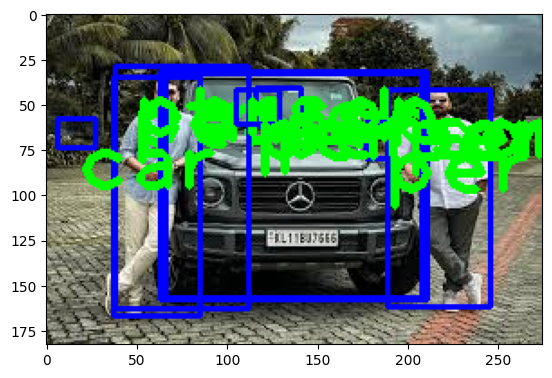

In [ ]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))